### Seattle Accident Severity

This notebook will be used to generate a model to predict the severity of an accident occurring in the Seattle area, given external conditions.

In [1]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## Business Understanding

In a world where commuting is inevitable, for work, leisure or otherwise, accidents seem to be unavoidable due to the sheer density of cars on the road and a need to get from point A to B as fast as possible. Accidents also tend to affect others as a source of traffic congestion, especially in areas of higher population density. 

In a motor vehicle, the risk of an accident is always present, however, it's likelihood as well as severity can be affected by many external factors such as visibility, road conditions, weather conditions etc. These factors are mostly out of our control, however, it would be extremely helpful if we were to know just how much these factors can contribute to the severity of an accident happening, to educate the driver to exercise more caution in certain conditions and circumstances as well as to provide alternative routes to avoid such an unfortunate event.

## Data Understanding

In order to gain insight into the contributions of external factors to collisions, we will review the Collisions - All Years dataset which comprises traffic collision data from the Seattle Police Department from the year 2004 to present.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/Trevy/Desktop/Data Sci Course/IBM DS/Final/Data-Collisions.csv")
df.head()

C:\Users\Trevy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [5]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

Description based values cannot be implemented into a model and will be filtered out as a result. This study will not consider the location of the accidents and the corresponding coordinates will be removed. Some of the attributes are also responses to accidents, such as PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT which are results of an accident and is not expected to contribute to the effectiveness of the model.

SPEEDING may be a good attribute that can be used in our model, in addition to INATTENTIONIND.

In [135]:
df['SPEEDING'].count()

9333

In [134]:
df['SPEEDING'].isnull().sum()

185340

In [136]:
df['INATTENTIONIND'].count()

29805

In [137]:
df['INATTENTIONIND'].isnull().sum()

164868

As we can see, unfortunately, the both attributes contain too many null values to be used in our model and are consequently left out.

We now look at the distributions of WEATHER, LIGHTCOND and ROADCOND.

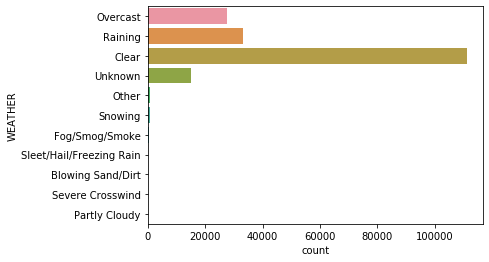

In [152]:
sns.countplot(y=df['WEATHER'],data=df)

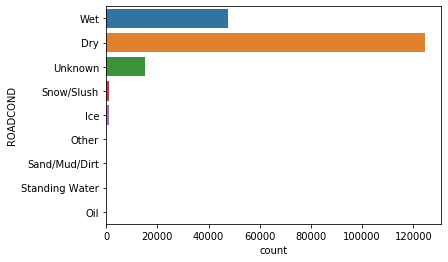

In [153]:
sns.countplot(y=df['ROADCOND'],data=df)

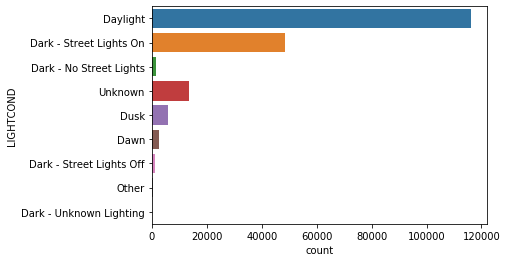

In [154]:
sns.countplot(y=df['LIGHTCOND'],data=df)

We extract the severity as the target variable and the weather, road conditions and light conditions as attributes.

In [7]:
df2 = df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']]

In [8]:
df2.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight
